In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}
// Avoid scrollable output for many plots

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import itertools
import tqdm
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
name = 'Passat GTE'
df = pd.read_parquet('2022-Aug-11-dataframe.parquet')
print('Number cars: {}'.format(df.shape[0]));
df.drop_duplicates(inplace=True)
print('Number cars: {}'.format(df.shape[0]));
#df["fuelTypeGasoline"] = df["fuelTypeGasoline"].astype(int)
#df["carTypeStationCar"] = df["carTypeStationCar"].astype(int)

df.head()

Number cars: 152
Number cars: 145


,headline,year,odometer,price,horsepower,region,carTypeStationCar,engineSize,trim
0,"VW Passat 1,4 GTE+ DSG 4d",2020,13000.0,339900.0,218.0,Nordjylland,False,"1,4",None
1,"VW Passat 1,4 GTE DSG 4d",2021,2000.0,385000.0,218.0,København,False,"1,4",None
2,"VW Passat 1,4 GTE+ Variant DSG 5d",2020,40000.0,419800.0,218.0,Fyn,True,"1,4",None
3,"VW Passat 1,4 GTE Variant DSG 5d",2020,19000.0,369900.0,218.0,Nordsjælland,True,"1,4",None
4,"VW Passat 1,4 GTE+ Pro Variant DSG 5d",2021,7000.0,424800.0,218.0,Nordjylland,True,"1,4",Pro


In [3]:
df[df.isnull().any(axis=1)]

,headline,year,odometer,price,horsepower,region,carTypeStationCar,engineSize,trim
0,"VW Passat 1,4 GTE+ DSG 4d",2020,13000.0,339900.0,218.0,Nordjylland,False,"1,4",None
1,"VW Passat 1,4 GTE DSG 4d",2021,2000.0,385000.0,218.0,København,False,"1,4",None
2,"VW Passat 1,4 GTE+ Variant DSG 5d",2020,40000.0,419800.0,218.0,Fyn,True,"1,4",None
3,"VW Passat 1,4 GTE Variant DSG 5d",2020,19000.0,369900.0,218.0,Nordsjælland,True,"1,4",None
7,"VW Passat 1,4 GTE+ Variant DSG 5d",2021,16000.0,395900.0,218.0,Syd- og Vestsjælland,True,"1,4",None
...,...,...,...,...,...,...,...,...,...
136,"VW Passat 1,4 GTE Variant DSG 5d",2020,10000.0,429900.0,218.0,København,True,"1,4",None
142,"VW Passat 1,4 GTE+ Variant DSG 5d",2020,19000.0,389900.0,218.0,Østjylland,True,"1,4",None
148,"VW Passat 1,4 GTE DSG 4d",2020,8000.0,424900.0,218.0,Østjylland,False,"1,4",None
150,"VW Passat 1,4 GTE Variant DSG 5d",2020,10000.0,420200.0,218.0,Østjylland,True,"1,4",None


In [4]:
#print('Number cars: {}'.format(df.shape[0]));
#df = df[df.price > 300_000]
#print('Number cars: {}'.format(df.shape[0]));

In [5]:
df.describe()

,year,odometer,price,horsepower
count,145.000000,135.000000,145.000000,145.0
mean,2020.668966,22208.555556,411829.048276,218.0
std,0.755123,16406.034523,43943.078222,0.0
min,2020.000000,1000.000000,309900.000000,218.0
25%,2020.000000,9250.000000,384000.000000,218.0
50%,2020.000000,19000.000000,409900.000000,218.0
75%,2021.000000,33000.000000,439700.000000,218.0
max,2022.000000,80000.000000,559900.000000,218.0


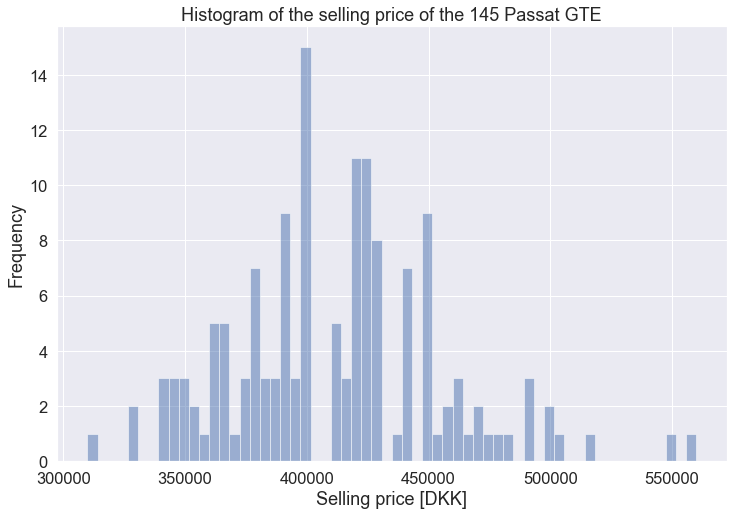

In [6]:
plt.rcParams["figure.figsize"] =(12,8)
ax = df['price'].plot.hist(bins=60, alpha=0.5);
ax.set_xlabel('Selling price [DKK]');
ax.set_title(f"Histogram of the selling price of the {df.shape[0]} {name}");

In [7]:
# Plot correlation matrix
corr = df.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1).set_precision(2)

/tmp/ipykernel_392670/2228427433.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1).set_precision(2)
/home/tjansson/miniconda3/envs/dev/lib/python3.10/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/tjansson/miniconda3/envs/dev/lib/python3.10/site-packages/pandas/io/formats/style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,year,odometer,price,horsepower,carTypeStationCar
year,1.00,-0.29,0.46,nan,0.17
odometer,-0.29,1.00,-0.63,nan,-0.01
price,0.46,-0.63,1.00,nan,0.29
horsepower,nan,nan,nan,nan,nan
carTypeStationCar,0.17,-0.01,0.29,nan,1.00


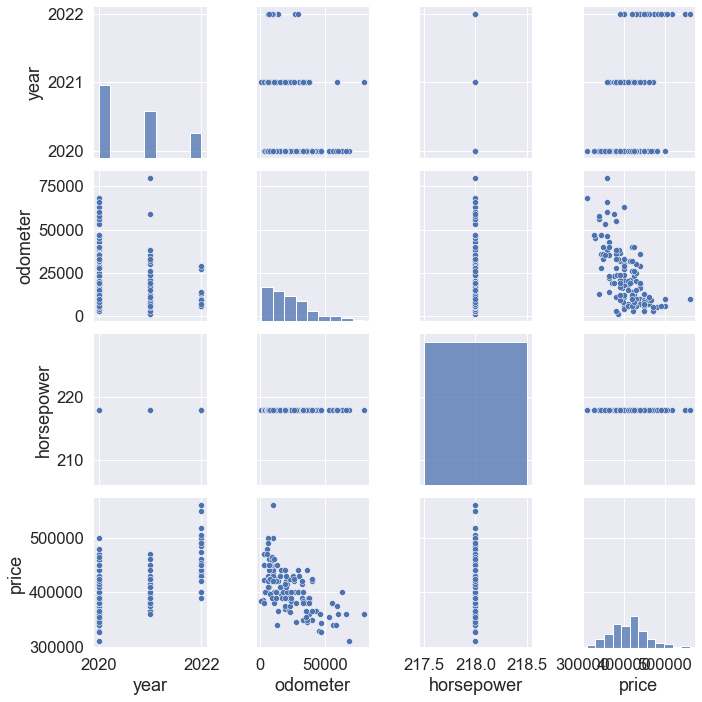

In [8]:
sns.pairplot(df[['year', 'odometer', 'horsepower', 'price']].copy());

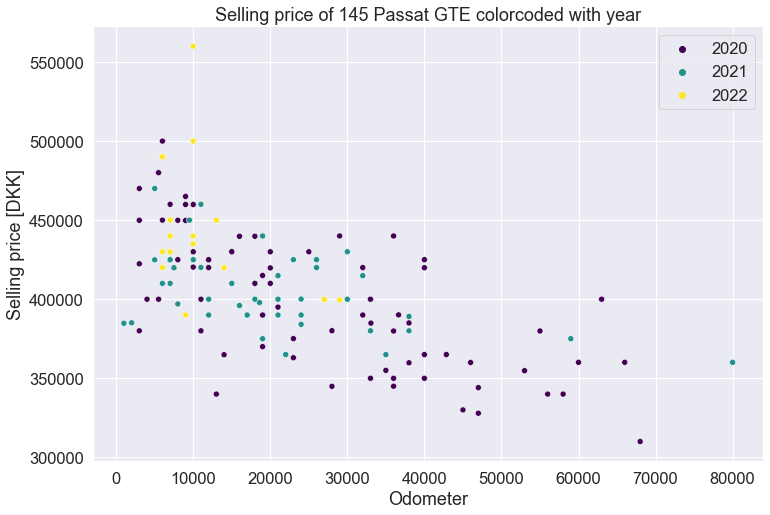

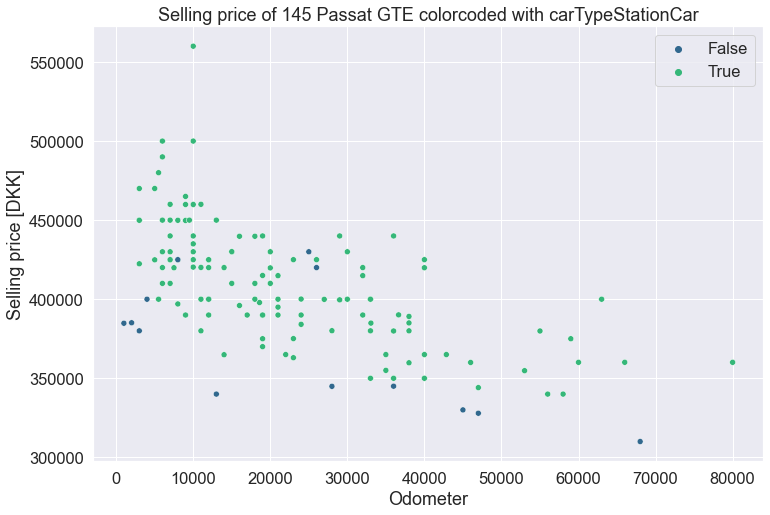

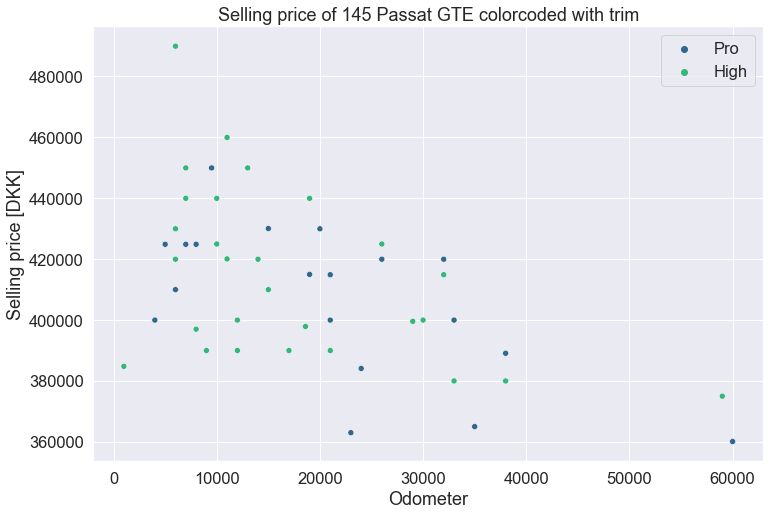

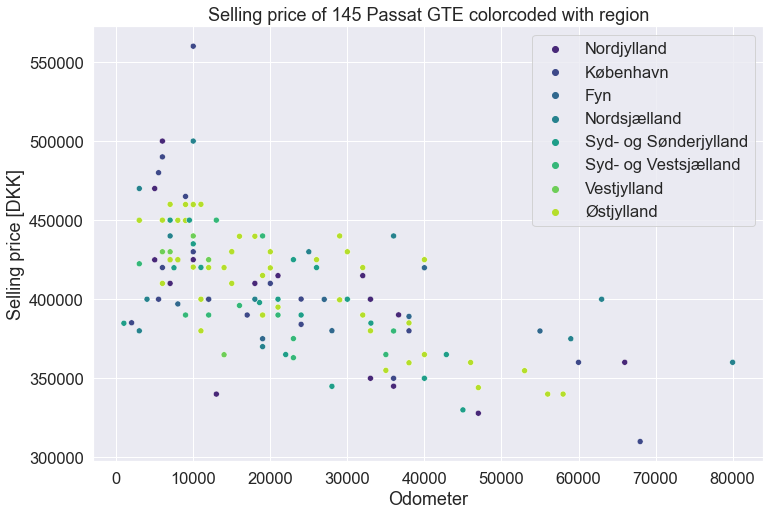

In [9]:
plt.rcParams["figure.figsize"] =(12,8)
customPalette = sns.set_palette(sns.color_palette(['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84']))
for hue in [
    'year',
    #'horsepower',
    #'transmissionManual',
    #'fuelTypeGasoline',
    'carTypeStationCar',
    'trim',
    #'engineSize',
    'region',
    ]:
    ax = sns.scatterplot(x="odometer", y="price", hue=df[hue].tolist(), data=df, palette='viridis')
    ax.set_ylabel('Selling price [DKK]');
    ax.set_xlabel('Odometer');
    ax.set_title(f'Selling price of {df.shape[0]} {name} colorcoded with {hue}');
    plt.show()

# Selected

In [10]:
# Find cars comparable to my own
selected_name = 'Passat GTE, variant, ~20000 km'
df_selected = df[
    (df.odometer < 25000) &
    (df.odometer > 10000) &
    # (df.trim == 'Style') &
    # (df.transmissionManual == True)
    # (df.fuelTypeGasoline == False)
    (df.carTypeStationCar == True)
]
print(f'Number of selected cars: {df_selected.shape[0]}')
df_selected.head()


Number of selected cars: 42


,headline,year,odometer,price,horsepower,region,carTypeStationCar,engineSize,trim
3,"VW Passat 1,4 GTE Variant DSG 5d",2020,19000.0,369900.0,218.0,Nordsjælland,True,"1,4",None
5,"VW Passat 1,4 GTE High Variant DSG 5d",2021,11000.0,419990.0,218.0,Syd- og Sønderjylland,True,"1,4",High
7,"VW Passat 1,4 GTE+ Variant DSG 5d",2021,16000.0,395900.0,218.0,Syd- og Vestsjælland,True,"1,4",None
12,"VW Passat 1,4 GTE Variant DSG 5d",2020,21000.0,394900.0,218.0,Østjylland,True,"1,4",None
13,"VW Passat 1,4 GTE+ Variant DSG 5d",2020,18000.0,439700.0,218.0,Østjylland,True,"1,4",None


In [11]:
df_selected.describe()

,year,odometer,price,horsepower
count,42.000000,42.000000,42.000000,42.0
mean,2020.571429,17442.857143,405615.690476,218.0
std,0.590281,4159.393885,24031.168511,0.0
min,2020.000000,11000.000000,362900.000000,218.0
25%,2020.000000,14000.000000,389900.000000,218.0
50%,2021.000000,18300.000000,399949.500000,218.0
75%,2021.000000,20750.000000,423522.500000,218.0
max,2022.000000,24000.000000,459900.000000,218.0


In [12]:
# Plot correlation matrix
corr = df_selected[['year', 'odometer', 'price']].corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap=cmap);
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1).set_precision(2)

/tmp/ipykernel_392670/3786991444.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1).set_precision(2)


,year,odometer,price
year,1.00,0.03,0.07
odometer,0.03,1.00,-0.36
price,0.07,-0.36,1.00


In [13]:
df_selected.year.unique()

array([2020, 2021, 2022])

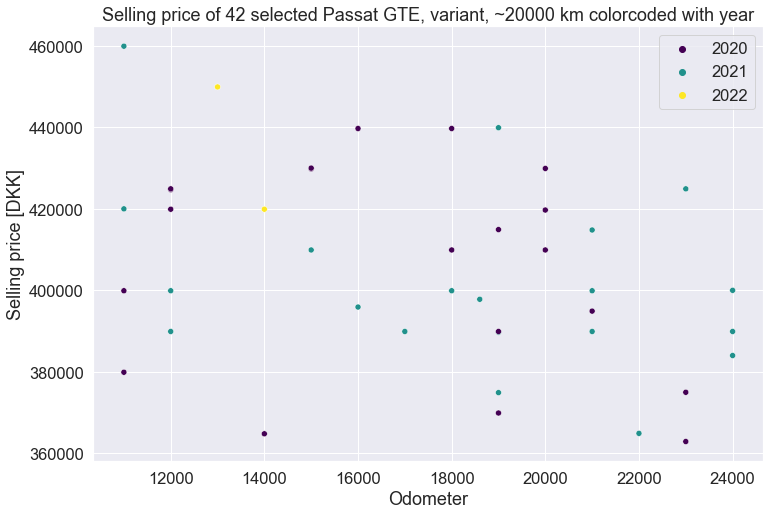

In [14]:
plt.rcParams["figure.figsize"] =(12,8)
customPalette = sns.set_palette(sns.color_palette(['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84']))
for hue in [
    'year',
    #'horsepower',
    # 'transmissionManual',
    #'fuelTypeGasoline',
    # 'carTypeStationCar',
    #'trim',
    #'engineSize',
    #'region',
    ]:
    ax = sns.scatterplot(x="odometer", y="price", hue=df_selected[hue].tolist(), data=df_selected,palette='viridis')
    ax.set_ylabel('Selling price [DKK]');
    ax.set_xlabel('Odometer');
    ax.set_title(f'Selling price of {df_selected.shape[0]} selected {selected_name} colorcoded with {hue}');
    plt.show()